## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Read the dataset
df = pd.read_csv('5.1-Algerian_forest_fires_dataset.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.shape

(246, 14)

In [9]:
### Assigning the label
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [11]:
df['Region'] = df['Region'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
### Removing the null values
df = df.dropna().reset_index(drop=True)

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
### Droping the header for other region w
df.drop(index=122, inplace=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
### Columns in df
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
### Fix spaces in columns name
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
### Change the required columns as integer data type
df[['month', 'year', 'Temperature', 'RH', 'day', 'Ws']] = df[['month', 'year', 'Temperature', 'RH', 'day', 'Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [23]:
### Changing the other columns as float
columns = [features for features in df.columns if df[features].dtype == 'O']

for column in columns:
    if column != 'Classes':
        df[column] = df[column].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [25]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [26]:
### Save the cleaned dataset
df.to_csv('5.1-Algerian_forest_fires_cleaned_dataset.csv', index=False)

In [27]:
df = pd.read_csv('5.1-Algerian_forest_fires_cleaned_dataset.csv')

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### Exploratory Data Analysis

In [30]:
### Drop day, month, year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [31]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [33]:
### if the Classes contain not fire then replace it with zero
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [34]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

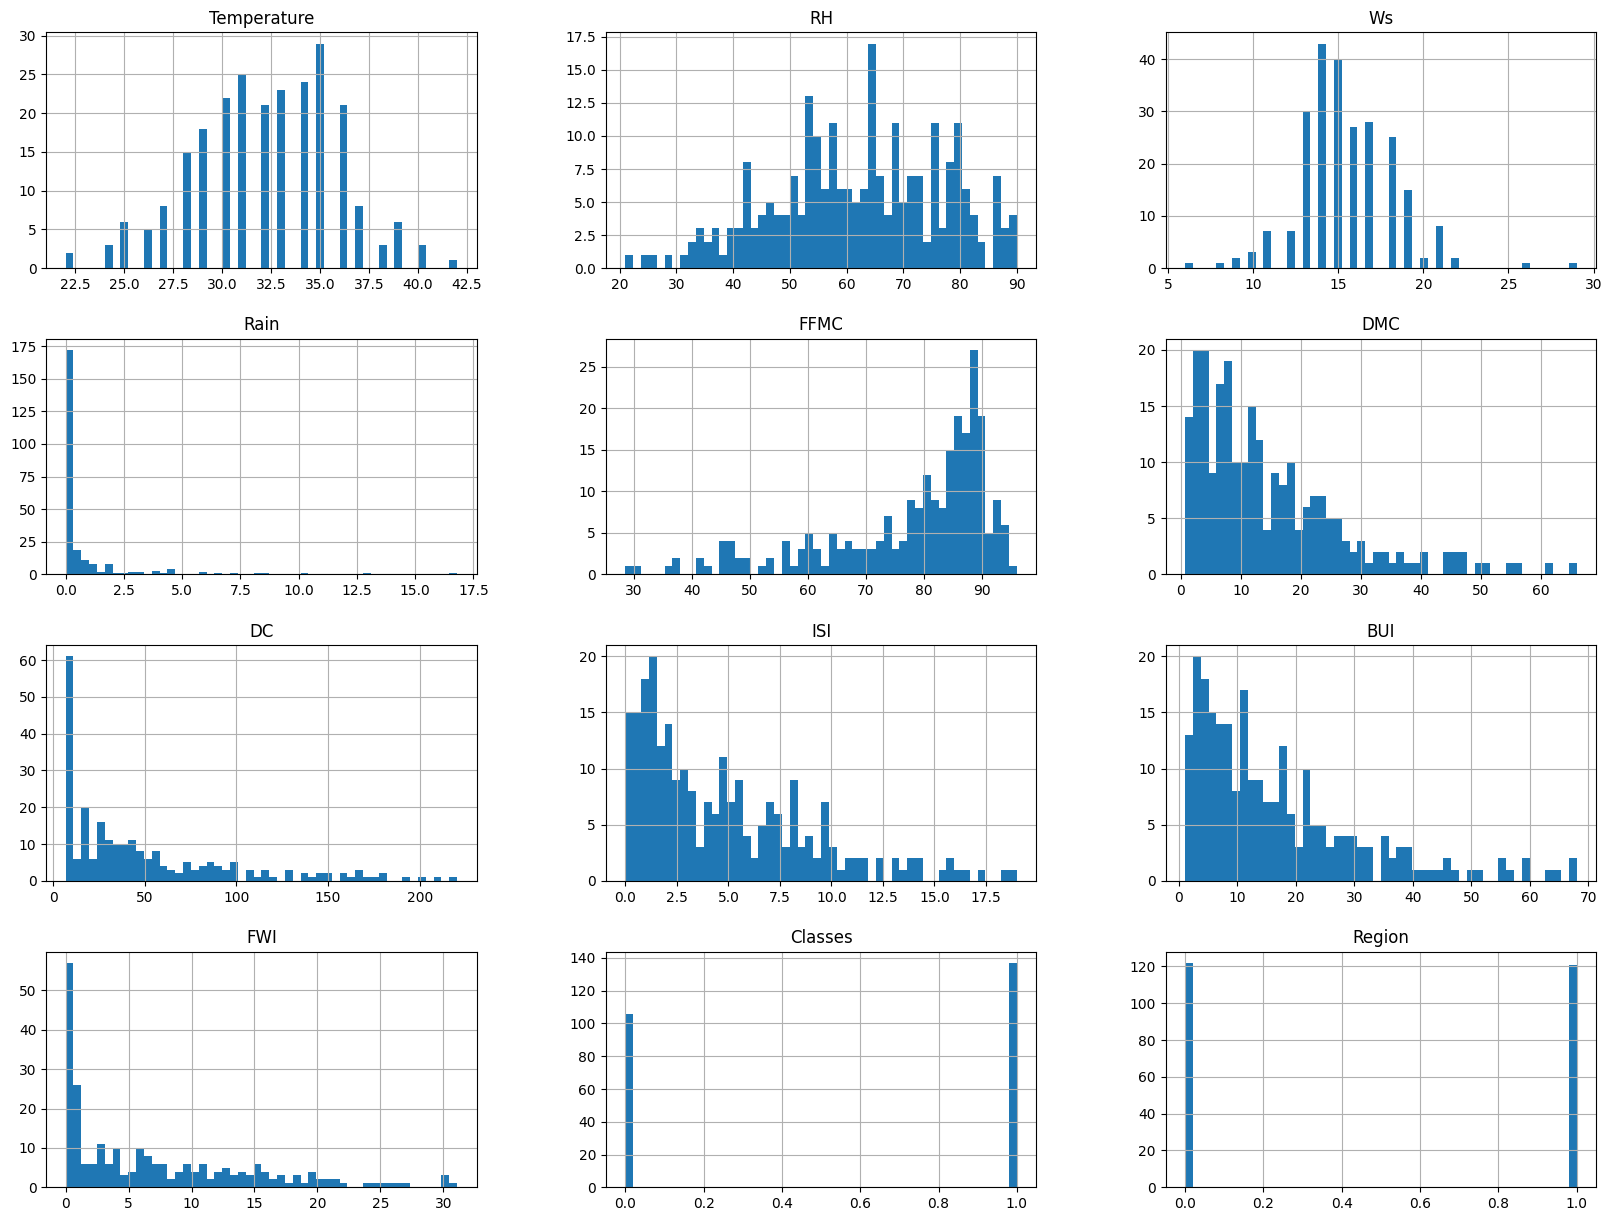

In [35]:
### Plot density plot for all features
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [37]:
### Percentage for fire and not fire
class_percentage = df['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie Chart for Classes')

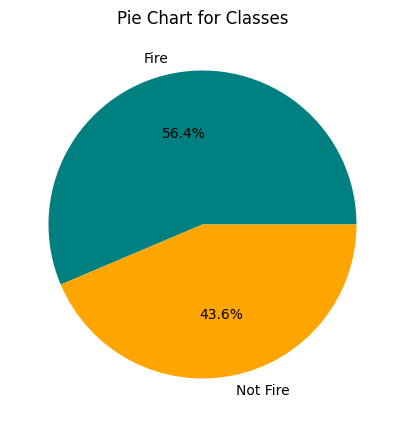

In [38]:
### Plotting pie chart
class_labels = ['Fire', 'Not Fire']
plt.figure(figsize=(11,5))
plt.pie(class_percentage, labels=class_labels, colors=['teal', 'orange'], autopct='%1.1f%%')
plt.title("Pie Chart for Classes")

In [39]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

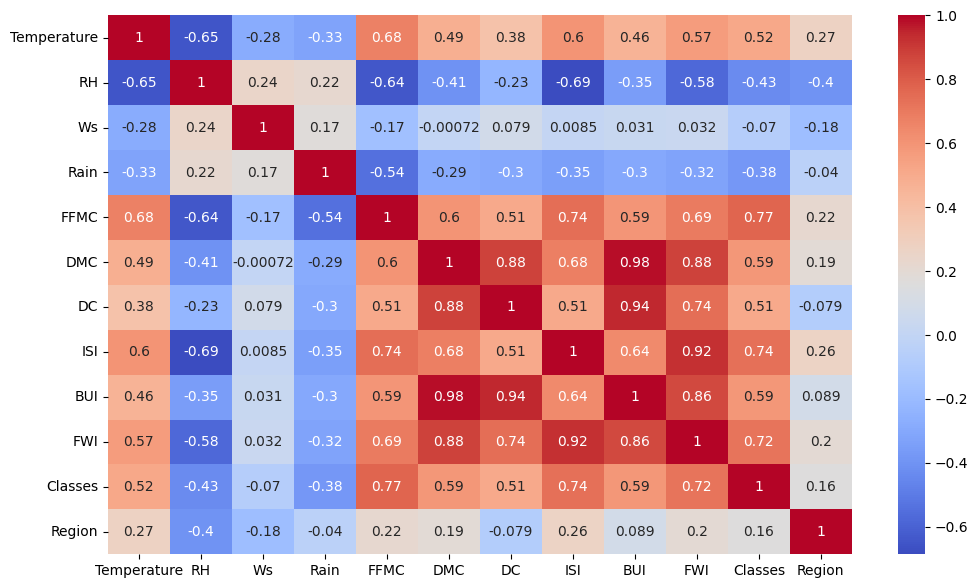

In [40]:
### Visualizing correlation with the help of heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<Axes: ylabel='FWI'>

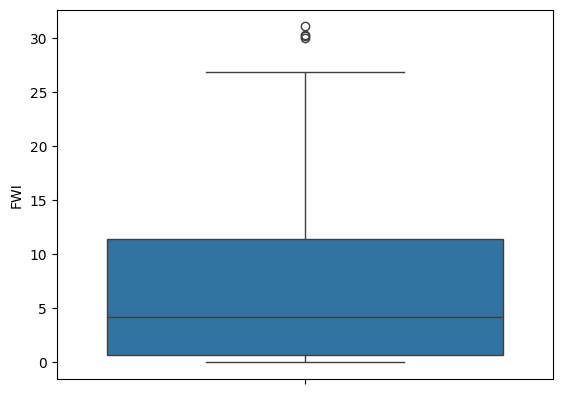

In [41]:
### Visualizing outliers with the help of Box Plot
sns.boxplot(df['FWI'])

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

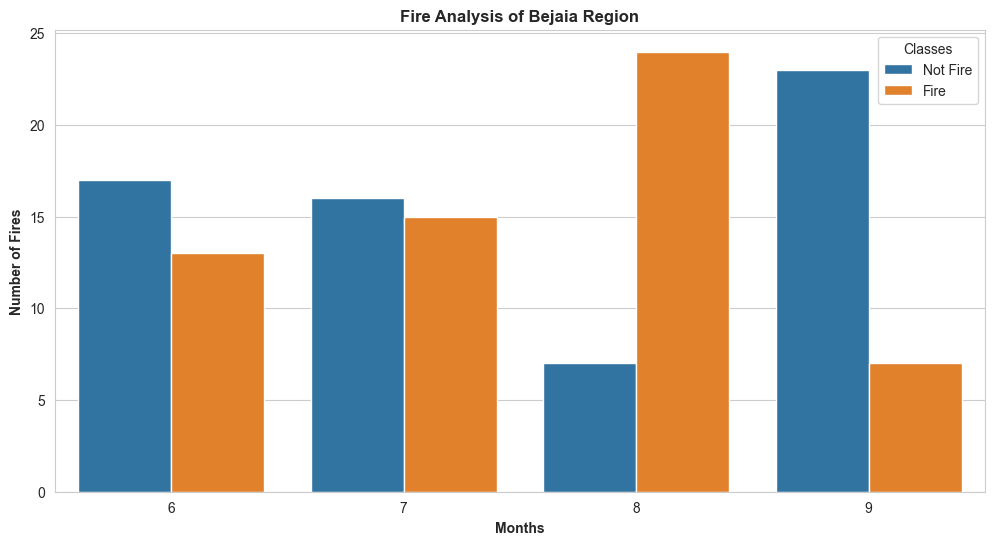

In [42]:
### Fire Analysis of the region
cleaned_df = pd.read_csv('5.1-Algerian_forest_fires_cleaned_dataset.csv')
cleaned_df['Classes'] = np.where(cleaned_df['Classes'].str.contains('not fire'), 'Not Fire', 'Fire')
cleaned_df['Classes'].value_counts()

### Monthly Fire Analysis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=cleaned_df.loc[cleaned_df['Region'] == 0])
plt.xlabel('Months', weight='bold')
plt.ylabel('Number of Fires', weight='bold')
plt.title('Fire Analysis of Bejaia Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Abbes Region')

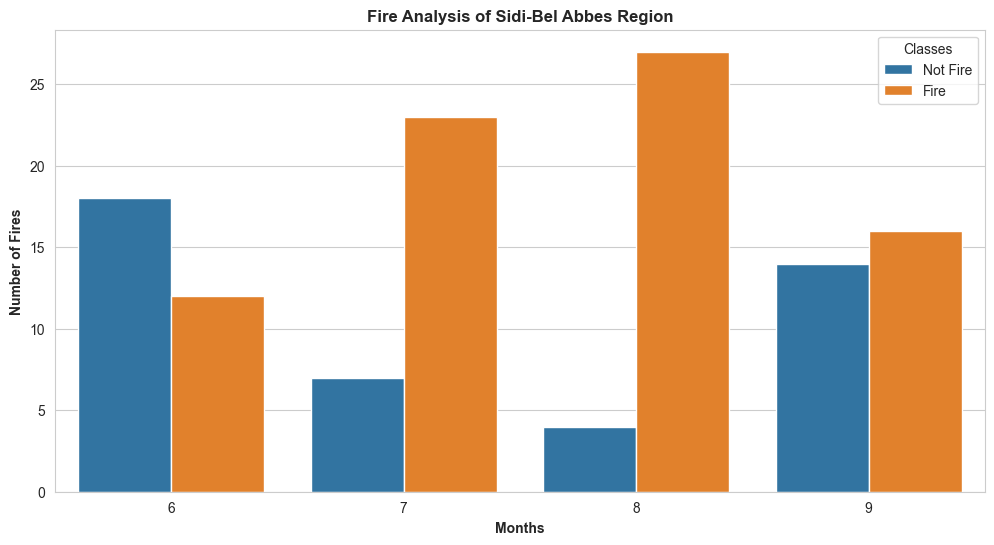

In [43]:
### Fire Analysis of the region
cleaned_df = pd.read_csv('5.1-Algerian_forest_fires_cleaned_dataset.csv')
cleaned_df['Classes'] = np.where(cleaned_df['Classes'].str.contains('not fire'), 'Not Fire', 'Fire')
cleaned_df['Classes'].value_counts()

### Monthly Fire Analysis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=cleaned_df.loc[cleaned_df['Region'] == 1])
plt.xlabel('Months', weight='bold')
plt.ylabel('Number of Fires', weight='bold')
plt.title('Fire Analysis of Sidi-Bel Abbes Region', weight='bold')

### Observation

- It is observed that in August had the most number of forest fires for both the regions.

- The Sidi-Bel Abbes Region had more number of forest fires than the Bejaia region.

### Model Training

In [44]:
df = pd.read_csv('5.1-Algerian_forest_fires_cleaned_dataset.csv')

In [45]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [47]:
### Drop Day, Month and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [48]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [49]:
### Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [50]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [51]:
### Independent and dependent feature
x = df.drop('FWI', axis=1)
y = df['FWI']

In [52]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [53]:
y.head

<bound method NDFrame.head of 0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64>

In [54]:
### Train - Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [56]:
### Feature selection based on correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

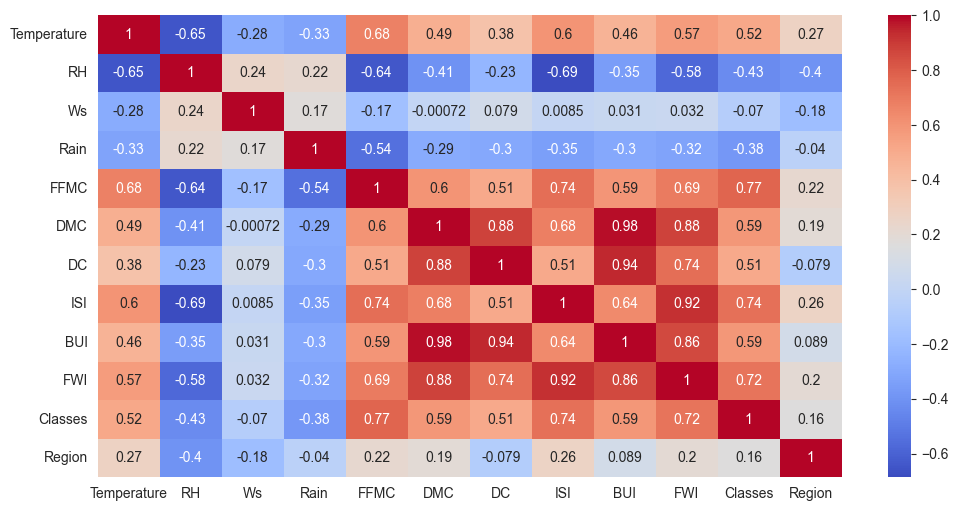

In [57]:
### Check for Multicollinearity
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [58]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [59]:
corr_features = correlation(x_train, 0.85)

In [60]:
### drop features when correlation is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

In [61]:
### Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

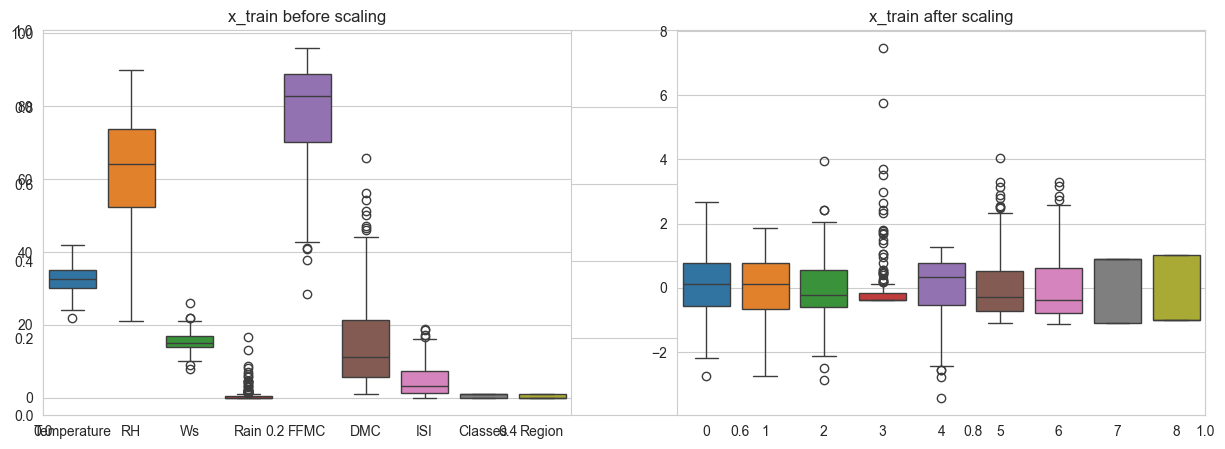

In [63]:
### Box Plot to understand effect of standard scaler on outlier
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

###  Model Training


In [64]:
### Linear Model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [65]:
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [66]:
y_test_predict = regression.predict(x_test_scaled)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  0.674276687379158
The mean absolute error is:  0.5468236465249978
The mean root mean error is:  0.8211435242265253
The r2 score is:  0.9847657384266951
The adjusted r2 score is:  0.9820773393255237


In [68]:
### Lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_test_predict = lasso.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  2.2483458918974772
The mean absolute error is:  1.133175994914409
The mean root mean error is:  1.4994485292591664
The r2 score is:  0.9492020263112388
The adjusted r2 score is:  0.9402376780132222


In [69]:
### Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_test_predict = ridge.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  0.6949198918152096
The mean absolute error is:  0.5642305340105715
The mean root mean error is:  0.8336185529456561
The r2 score is:  0.9842993364555512
The adjusted r2 score is:  0.9815286311241779


In [70]:
### Elastic Net regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(x_train_scaled, y_train)
y_test_predict = elastic.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  5.5172511010252245
The mean absolute error is:  1.8822353634896005
The mean root mean error is:  2.3488829474933874
The r2 score is:  0.8753460589519703
The adjusted r2 score is:  0.8533483046493768


### Cross Validation

In [71]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled, y_train)
y_test_predict = lassocv.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  0.792499555474362
The mean absolute error is:  0.619970115826343
The mean root mean error is:  0.8902244410677355
The r2 score is:  0.9820946715928275
The adjusted r2 score is:  0.9789349077562677


In [72]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [73]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [74]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [75]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [76]:
### Hyperparameter tuning with the help of RidgeCV

from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled, y_train)
y_test_predict = ridgecv.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  0.6949198918152096
The mean absolute error is:  0.5642305340105715
The mean root mean error is:  0.8336185529456561
The r2 score is:  0.9842993364555512
The adjusted r2 score is:  0.9815286311241779


In [77]:
ridgecv.alpha_

np.float64(1.0)

In [78]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [79]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [80]:
### Hyperparameter tuning with the help of ElasticNetCV

from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled, y_train)
y_test_predict = elasticcv.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_test_predict)
### Adjusted R Square
n = len(y_test)
k = x_test_scaled.shape[1]

adusted_score = 1 - (1-score)*(n - 1)/(n-k-1)

print('The mean squared error is: ', mse)
print('The mean absolute error is: ', mae)
print('The mean root mean error is: ', rmse)
print('The r2 score is: ', score)
print('The adjusted r2 score is: ', adusted_score)

The mean squared error is:  0.8222830416276258
The mean absolute error is:  0.6575946731430898
The mean root mean error is:  0.906798236449336
The r2 score is:  0.9814217587854941
The adjusted r2 score is:  0.978143245629993


In [81]:
elasticcv.alpha_

np.float64(0.04311146156383891)

In [82]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [83]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### Model Pickling

In [84]:
scaler

StandardScaler()

In [85]:
ridge

Ridge()

In [86]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))